# Narrowband Dataset
This notebook showcases the Narrowband dataset.

---

In [1]:
# Define Variables

num_iq_samples_dataset = 4096 # 64^2
fft_size = 64
impairment_level = 0 # clean

## Narrowband Metadata
In order to create a NewNarrowband dataset, you must define parameters in NarrowbandMetadata. This can be done either in code or inside a YAML file. Below we show how to do both. Look at `narrowband_example.yaml` for a sample YAML file.

There are three required parameters: 
1. `num_iq_samples_dataset` -> how much IQ data per sample
2. `fft_size` -> Size of FFT (number of bins) to be used in spectrogram.
3. `impairment_level` -> what environment impairment to simulate.

Additionally, there are several optional parameters that can be overriden.

In [ ]:
# Option 1: Instantiate NarrowbandMetadata object
from torchsig.datasets.dataset_metadata import NarrowbandMetadata

narrowband_metadata_1 = NarrowbandMetadata(
    num_iq_samples_dataset = num_iq_samples_dataset, # 64^2
    fft_size = fft_size,
    impairment_level = impairment_level, # clean
)
print(narrowband_metadata_1)


NarrowbandMetadata
----------------------------------------------------------------------------------------------------
num_iq_samples_dataset        4096      
num_samples                   None
impairment_level              0
fft_size                      64
sample_rate                   10000000.0
num_signals_min               1
num_signals_max               1
num_signals_distribution      None
snr_db_min                    0.0
snr_db_max                    50.0
signal_duration_percent_min   80.0
signal_duration_percent_max   100.0
transforms                    []
target_transforms             []
class_list                    ['ook', 'bpsk', '4ask', 'qpsk', '8ask', '8psk', '16qam', '16ask',
                               '16psk', '32qam', '32qam_cross', '32ask', '32psk', '64qam', '64ask',
                               '64psk', '128qam_cross', '256qam', '512qam_cross', '1024qam', '2fsk',
                               '2gfsk', '2msk', '2gmsk', '4fsk', '4gfsk', '4msk', '4gmsk', '8fs

In [ ]:
# Option 2: Instantiate as a dictionary object

narrowband_metadata_2 = dict(
    num_iq_samples = num_iq_samples_dataset,
    fft_size = fft_size,
    impairment_level = impairment_level,
)
print(narrowband_metadata_2)

{'num_iq_samples': 4096, 'fft_size': 64, 'impairment_level': 0}


In [ ]:
# Option 3: Instantiate from YAML file
# see narrowband_example.yaml

narrowband_metadata_3 = "narrowband_example.yaml"
print(narrowband_metadata_3)

narrowband_example.yaml


## Infinite Dataset
To create an infinite dataset, simply instantiate a NewNarrowband object. Ensure the `num_samples_dataset` field inside the NarrowbandMetadata is set to None.

Notes:
* You will not be able to access previously generated samples.
* You cannot save an infinite dataset to disk.

In [ ]:
from torchsig.datasets.dataset_metadata import NarrowbandMetadata
from torchsig.datasets.narrowband import NewNarrowband

narrowband_infinite_metadata = NarrowbandMetadata(
    num_iq_samples_dataset = num_iq_samples_dataset,
    fft_size = fft_size,
    impairment_level = impairment_level,
    num_samples = None,
)

narrowband_infinite = NewNarrowband(
    dataset_metadata = narrowband_infinite_metadata
)
# print(narrowband_infinite)

for i in range(10):
    data, metadata = narrowband_infinite[i]
    if i == 5:
        print(f"IQ Data: {data.shape}")
        print(f"Signal Metadata: {metadata}")

# should fail
print()
try:
    narrowband_infinite[0]
except Exception as E:
    print(E)

IQ Data: (4096,)
Signal Metadata: [{'center_freq': -33802.376338780276, 'bandwidth': 6406250.0, 'start_in_samples': 337, 'duration_in_samples': 3402, 'snr_db': 15.0, 'class_name': '4fsk', 'class_index': 24, 'sample_rate': 10000000.0, 'num_samples': 3402, 'start': 0.082275390625, 'stop': 0.912841796875, 'duration': 0.83056640625, 'stop_in_samples': 3739, 'upper_freq': 3169322.6236612196, 'lower_freq': -3236927.3763387804, 'oversampling_rate': 1.5609756097560976, 'samples_per_baud': 1.5609756097560976}]

cannot access previously generated samples in NewNarrowband for index 0. Ensure you are accessing dataset in order (0, 1, 2,...) or save dataset with DatasetCreator


## Finite Dataset
To create a finite dataset, set `num_samples` = any positive integer number.

Note: you will still not be able to access previously generated samples.

In [ ]:
from torchsig.datasets.dataset_metadata import NarrowbandMetadata
from torchsig.datasets.narrowband import NewNarrowband


narrowband_finite_metadata = NarrowbandMetadata(
    num_iq_samples_dataset = num_iq_samples_dataset,
    fft_size = fft_size,
    impairment_level = impairment_level,
    num_samples = 10,
)

narrowband_finite = NewNarrowband(
    dataset_metadata = narrowband_finite_metadata
)
# print(narrowband_finite)

for i in range(11):
    if i == 10: # should fail
        try:
            data, metadata = narrowband_finite[i]
        except Exception as E:
            print(E)
    else:
        data, metadata = narrowband_finite[i]
        print(f"sample {i} generated successfully")

sample 0 generated successfully
sample 1 generated successfully
sample 2 generated successfully
sample 3 generated successfully
sample 4 generated successfully
sample 5 generated successfully
sample 6 generated successfully
sample 7 generated successfully
sample 8 generated successfully
sample 9 generated successfully
index 10 is out of bounds for finite dataset with 10 num_samples.


### Writing Dataset to Disk
In order to access previosuly generated examples, or save the finite dataset for later, use the `DatasetCreator`. Pass in the Dataset to be saved, where to write the dataset (root), and whether to overwrite any exisitng datasets.

In [ ]:
from torchsig.datasets.dataset_metadata import NarrowbandMetadata
from torchsig.datasets.narrowband import NewNarrowband
from torchsig.utils.writer import DatasetCreator
from torchsig.signals.signal_lists import TorchSigSignalLists

root = "./datasets/narrowband_example"
class_list = TorchSigSignalLists.all_signals
num_samples = len(class_list) * 10
seed = 775489032758493

narrowband_finite_metadata = NarrowbandMetadata(
    num_iq_samples_dataset = num_iq_samples_dataset,
    fft_size = fft_size,
    impairment_level = impairment_level,
    num_samples = num_samples,
    class_list = class_list,
    seed = seed
)

narrowband_finite = NewNarrowband(
    dataset_metadata = narrowband_finite_metadata
)

dataset_creator = DatasetCreator(
    dataset = narrowband_finite,
    root = root,
    # overwrite = True,
    # increase the batch size and num_workers to speed up
    # batch_size = 24,
    # num_workers = 24
)

dataset_creator.create()

Dataset already exists in datasets/narrowband_example/torchsig_narrowband_clean. Not regenerating.


### Reading Dataset from Disk
Assuming you wrote a dataset to disk, you can load it back in my instantiating a `StaticNarrowband`.

Warning: The following code assumes you have the code in the section **Writing Dataset to Disk**

In [ ]:
from torchsig.datasets.narrowband import StaticNarrowband

static_narrowband = StaticNarrowband(
    root = root,
    impaired = impairment_level > 0,
)

# can access any sample
print(static_narrowband[0])
print(static_narrowband[5])

(array([ 0.42851594+0.838113j  , -1.6040852 +0.5926943j ,
        1.2577479 -0.9135416j , ..., -0.45235795+0.31928617j,
        0.16980311+0.52793366j,  0.87611085-2.13208j   ], dtype=complex64), [{'center_freq': 821075.0106499386, 'bandwidth': 8357849.977700123, 'start_in_samples': 81, 'duration_in_samples': 3751, 'snr_db': 26.4, 'class_name': 'ofdm-300', 'class_index': 41, 'sample_rate': 10000000.0, 'num_samples': 3751, 'start': 0.019775390625, 'stop': 0.935546875, 'duration': 0.915771484375, 'stop_in_samples': 3832, 'upper_freq': 4999999.9995, 'lower_freq': -3357849.9782001227, 'oversampling_rate': 1.1964799591619084, 'samples_per_baud': 1.1964799591619084}])
(array([-0.529169  -1.1210954j ,  1.3865619 -0.387143j  ,
        0.34979463+0.37946066j, ...,  0.8203771 +1.0355349j ,
        0.44514754+0.90592283j, -0.65009904+0.0896105j ], dtype=complex64), [{'center_freq': -468226.09105879476, 'bandwidth': 3593750.0, 'start_in_samples': 188, 'duration_in_samples': 3878, 'snr_db': 8.5, 'c

If the dataset writtent to disk is raw (aka no Transforms or Target Transforms were applied to it before writing to disk), then you can define whatever transforms and target transforms inside the StaticNarrowband.

In [ ]:
print(f"Dataset Raw: {static_narrowband.raw}")

Dataset Raw: True


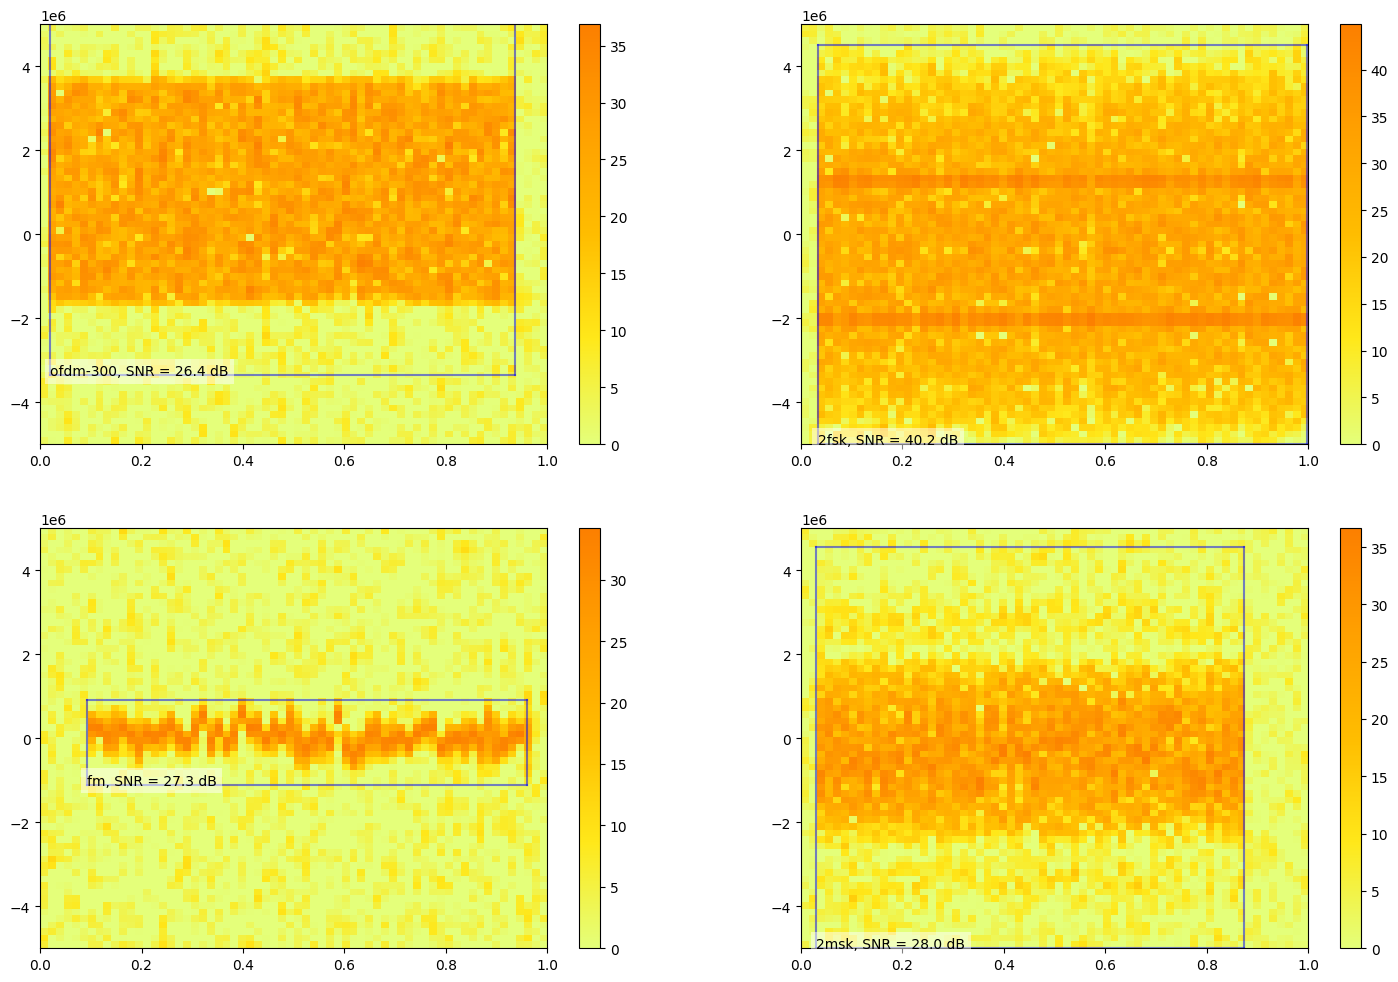

In [ ]:
from torchsig.datasets.narrowband import StaticNarrowband
from torchsig.transforms.dataset_transforms import Spectrogram
from torchsig.transforms.target_transforms import (
    ClassName,
    Start,
    Stop,
    LowerFreq,
    UpperFreq,
    SNR
)
import matplotlib.pyplot as plt

target_transform = [
    ClassName(),
    Start(),
    Stop(),
    LowerFreq(),
    UpperFreq(),
    SNR()
]

static_narrowband = StaticNarrowband(
    root = root,
    impaired = impairment_level > 0,
    transforms = Spectrogram(fft_size = fft_size),
    target_transforms = target_transform,
)
sample_rate = static_narrowband.dataset_metadata.sample_rate
noise_power_db = static_narrowband.dataset_metadata.noise_power_db

num_show = 4
num_cols = 2
num_rows = num_show // num_cols

fig = plt.figure(figsize=(18,12))

xmin = 0
xmax = 1
ymin = -sample_rate / 2
ymax = sample_rate / 2

# fig.suptitle(f"class: {classname}", fontsize=16)
# plt.ylabel("Frequency (Hz)")
# plt.xlabel("Time")
fig.tight_layout()

for i in range(num_show):
    data, targets = static_narrowband[i]
    ax = fig.add_subplot(num_rows,num_cols,i + 1)

    pos = ax.imshow(data,extent=[xmin,xmax,ymin,ymax],aspect='auto',cmap='Wistia',vmin=noise_power_db)
    fig.colorbar(pos, ax=ax)

    # for t in targets:
    classname, start, stop, lower, upper, snr = targets


    ax.plot([start,start],[lower,upper],'b',alpha=0.5)
    ax.plot([stop, stop],[lower,upper],'b',alpha=0.5)
    ax.plot([start,stop],[lower,lower],'b',alpha=0.5)
    ax.plot([start,stop],[upper,upper],'b',alpha=0.5)
    textDisplay = str(classname) + ', SNR = ' + str(snr) + ' dB'
    ax.text(start,lower,textDisplay, bbox=dict(facecolor='w', alpha=0.5, linewidth=0))
    ax.set_xlim([0,1])
    ax.set_ylim([-sample_rate/2,sample_rate/2])

## Narrowband Dataset Statistics

Below are some plots and statistics about the Narrowband dataset.

In [11]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

class_list = static_narrowband.dataset_metadata.class_list
snr_list = []

class_counter = {class_name: 0 for class_name in class_list}

for sample in tqdm(static_narrowband, desc = "Calculating Narrowband Stats"):
    data, targets = sample
    classname, start, stop, lower, upper, snr = targets
    snr_list.append(snr)
    class_counter[classname] += 1

class_counts = list(class_counter.values())
class_names = list(class_counter.keys())


Calculating Narrowband Stats:   0%|          | 0/570 [00:00<?, ?it/s]

Class Distribution Setting: None


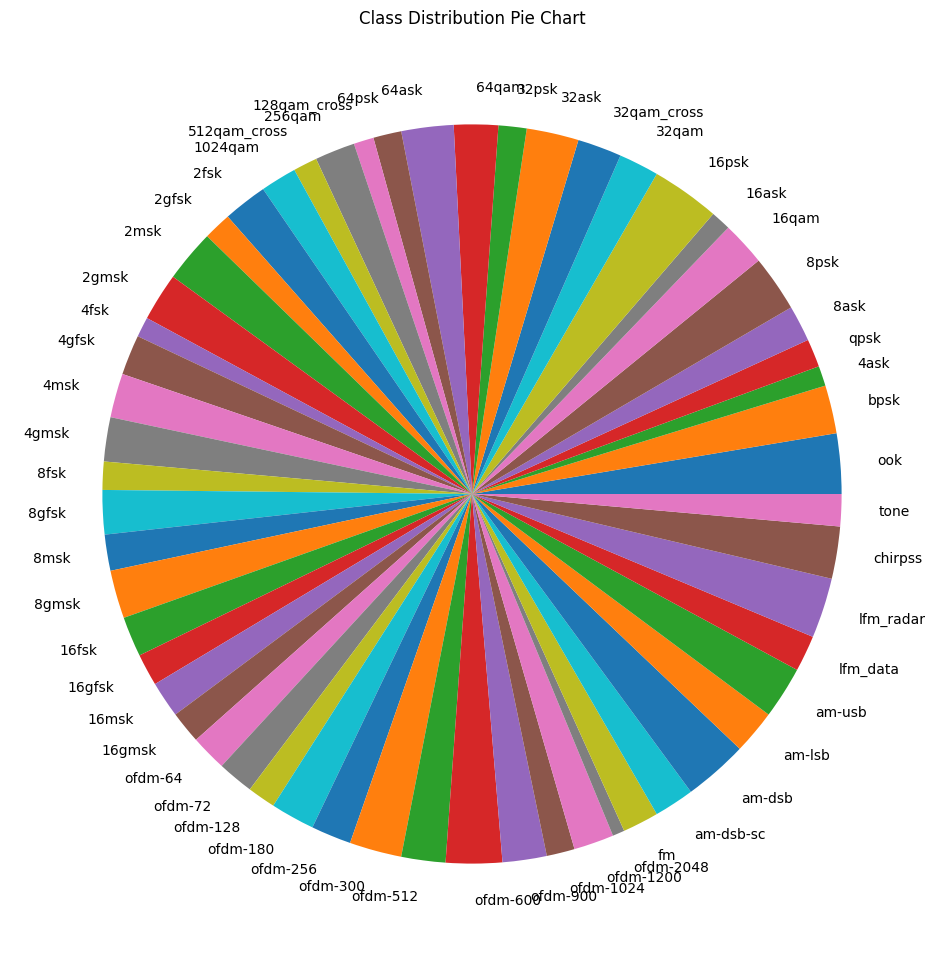

In [12]:
# Class Distribution Pie Chart
# by default, the class distribution is None aka uniform
print(f"Class Distribution Setting: {static_narrowband.dataset_metadata.class_distribution}")
plt.figure(figsize=(12, 12))
plt.pie(class_counts, labels = class_names)
plt.title("Class Distribution Pie Chart")
plt.show()

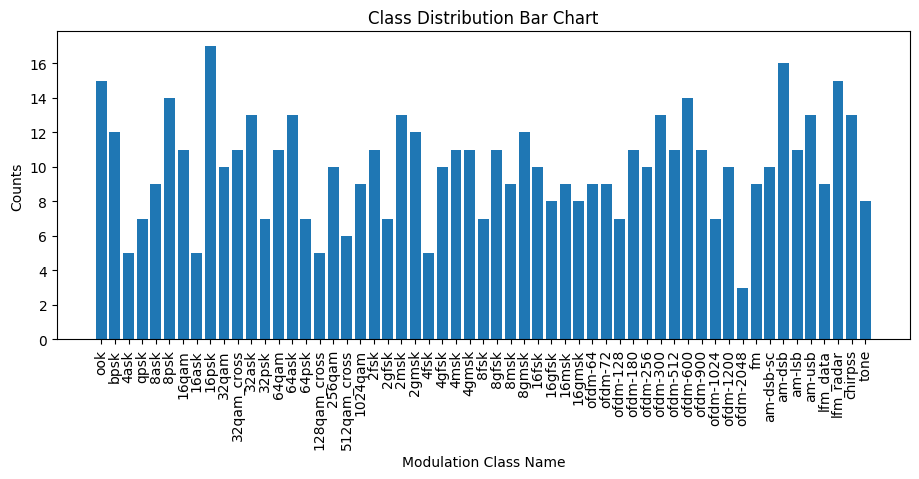

In [13]:
# Class Distribution Bar Chart
plt.figure(figsize=(11, 4))
plt.bar(class_names, class_counts)
plt.xticks(rotation=90)
plt.title("Class Distribution Bar Chart")
plt.xlabel("Modulation Class Name")
plt.ylabel("Counts")
plt.show()

Min SNR Setting: 0.0
Max SNR Setting: 50.0


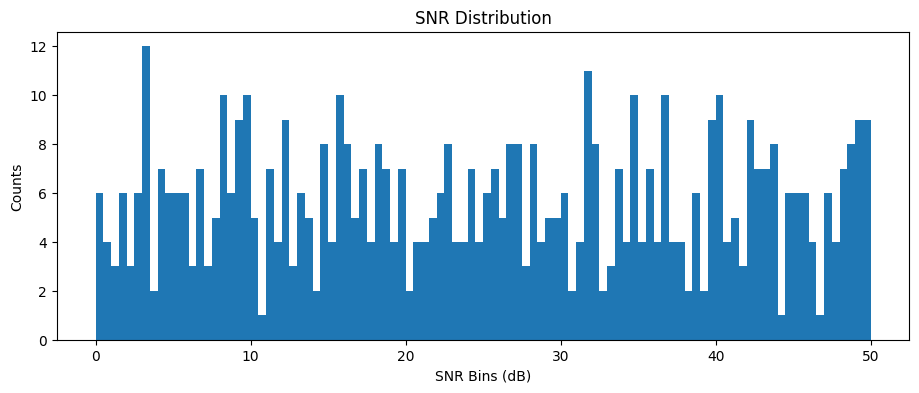

In [14]:
# SNR Distributions
# For narrowband, the default min and max SNR is 0 and 50 db, respectively
print(f"Min SNR Setting: {static_narrowband.dataset_metadata.snr_db_min}")
print(f"Max SNR Setting: {static_narrowband.dataset_metadata.snr_db_max}")
plt.figure(figsize=(11, 4))
plt.hist(x=snr_list, bins=100)
plt.title("SNR Distribution")
plt.xlabel("SNR Bins (dB)")
plt.ylabel("Counts")
plt.show()